In [22]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

# Bayesian inference in NLP
The most common form of Bayesian formula in NLP is as follows:

$$
P(\theta | D)=\frac{P(D | \theta) \times P(\theta)}{P(D)}\\
$$

in which $P(\theta | D)$ is called **Posterior**, $P(D | \theta)$ is **Likelihood**, $P(\theta)$ is **Prior** and $P(D)$
is **Marginal** distribution. When people use Bayesian theorem, they actually are trying to **infer** some results about the **Posterior**. However, sometimes it is **very difficult** even impossible to find the value for the posterior function directly from the Bayes’ formula. For example, if the posterior was an **integral who does not have analytical solution** or it does but it was **computationally expensive** to find the answer, someone needs to find another way to infer the result. In such cases, **Markov Chain Monte Carlo (MCMC)** methods can help.

## MCMC background
**Monte Carlo** methods are in fact **sampling methods**. **Markov Chains** are a branch of these family which have pretty wide applications from **Population Genetics** to **NLP**. Here, I will provide a brief background of MCMC methods and then we will see how we can apply it to the Bayes’ Formula. First, let’s see some critical definitions:
- A **Stochastic process** is a non-deterministic sequence of random variables, $x^{(i)}$, for $x^{(i)} \in X$.

$$
x^{(1)} \to x^{(2)} \to x^{(3)} \to  ...
$$

- A **Markov process** is a stochastic process in which future states are **independent** of the past states and it only depends on the **current state**. Therefore, we can say that the Markov process is **memoryless**.
- The $n \times n$ matrix **$W_{ij} = P (x_i | x_j)$** which is defined for a state space with n states, is called **Transition probability** matrix. It specifies the Markov process.
- If $\pi$ shows a vector of the probability of all of the states such as $\pi = [\pi_{x_1}, \pi_{x_2}, ... , \pi_{x_n}]^T$ therefore, since the Markov process is **memoryless**, after $n+1$ cycle we will get the following results:

$$
\pi^{(n+1)} = W \pi^{(n)} = W^n \pi^{(1)}
$$

and after enough cycles:

$$
\pi^{(\infty)} = W \pi^{(\infty)}
$$

It means that it forgets where it started from. We call that $\pi^{\infty}$  the **Stationary Distribution**. It is actually the **eigenvector of W corresponding to eigenvalue 1**.

### Reqiured conditions
Every Markov process must meet the following conditions:
1.	**Ergodicity :** The Markov chain must visit all states in the state space.
2.	**Normalization :** The columns of W must add up to 1.
3.	**Balance :** It ensures that the equilibrium state corresponds to eigenvalue 1.
$$
\pi = W \pi \\
$$
4. **Detailed Balance :** The net traffic between any two states is zero.

$$
W_{ij} \pi_{j} = W_{ji} \pi_{i}
$$

this is a **sufficient** condition which intuitively implies the balance condition.

To simplify the above definition let's consider an example. Look at the following picture which shows the probability of the usage of the programming languages among people:

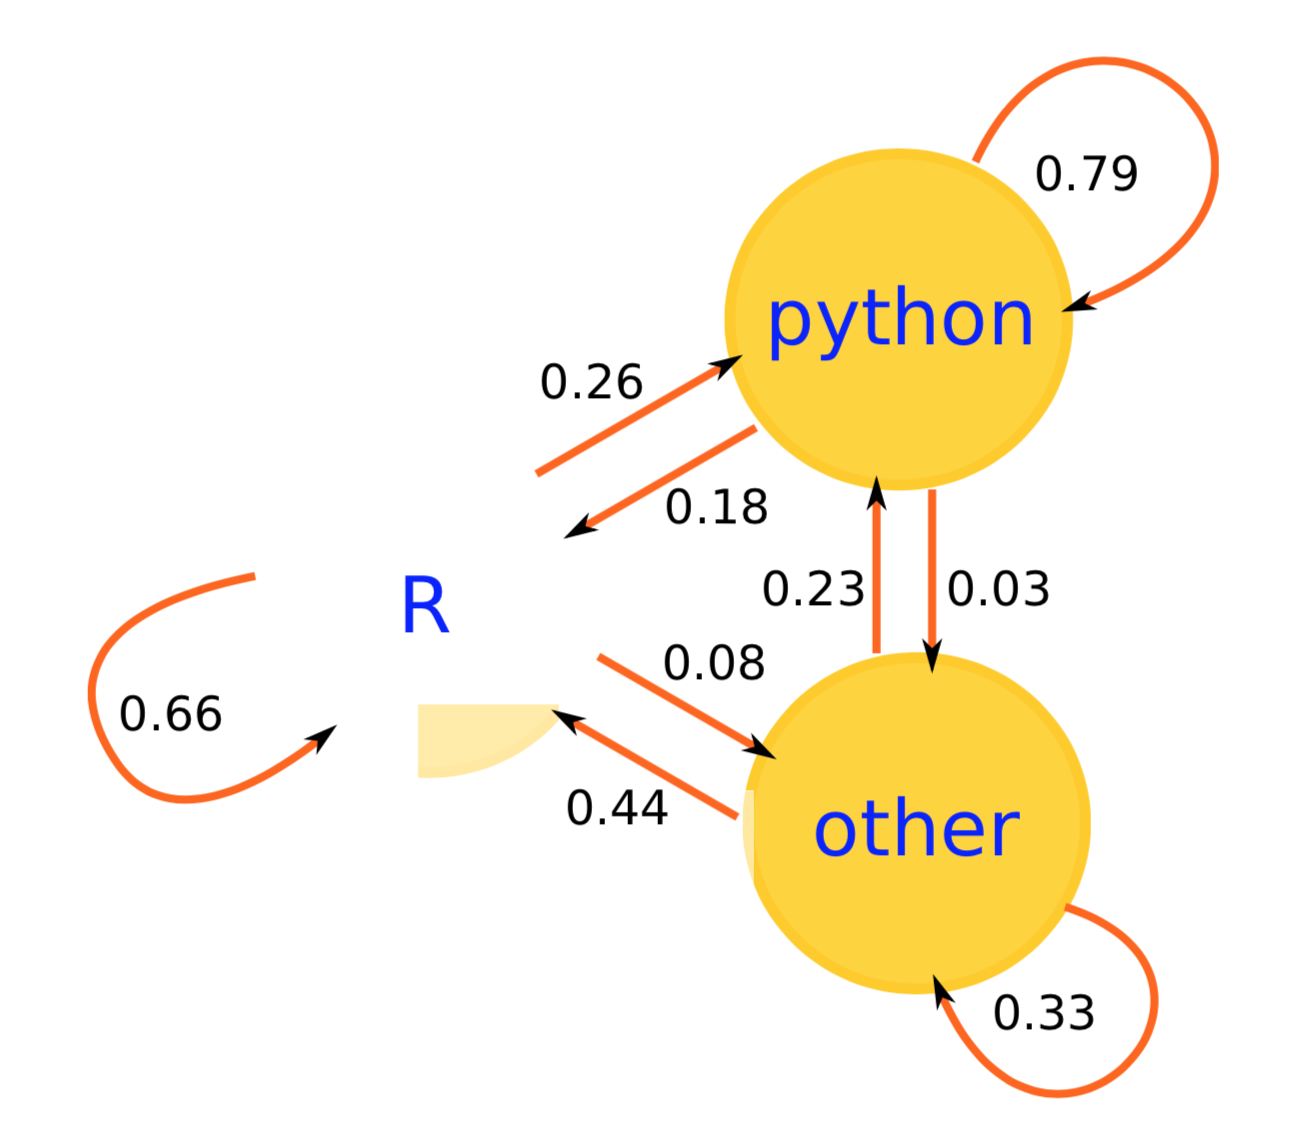

In [14]:
Image("11.png", width = 500, height = 200)

Therefore, we have $X = \{r, o, p\}$ and we can initialize $\pi$ with any values we wish (since it is considered to be a stationary distribution). Therefore, we have:

$$
  W =
  \left[ {\begin{array}{ccc}
   0.66 & 0.18 & 0.44\\
   0.26 & 0.79 & 0.23\\
   0.08 & 0.03 & 0.33\\
  \end{array} } \right]
$$

and now if W satisfies the mentioned required conditions,  can be uniquely determined as the eigenvector of W corresponding to eigenvalue 1. Therefore, $\pi = [0.3812, 0.5487, 0.0701]^T$.

## Metropolis MCMC
**Metropolis** is one of the MCMC algorithms which is usually being used for higher dimension problems. The algorithm is as follows:
1. Specify the **distribution $\pi(x)$**.
2. **Propose** a nearby point randomly:
$$
p (x_n | x_c) = U [x_c -\delta, x_c + \delta]\\
$$
in which $x_c$ is the **current state** and $x_n$ is the **new state**. However, the proposal distribution could be any distribution such as **normal**, **uniform**, etc.
3. The proposed move is **accepted** or **rejected**. Indeed, we use **Detailed Balance** to find out if we accept or reject the new state.
$$
W(x_c \to x_n) \pi (x_c) = W(x_n \to x_c) \pi (x_n)\\
$$
The net transition probabilities can be decomposed to **proposal** and **acceptance** contributions:
$$
W(x_c \to x_n) = p(x_c \to x_n)a(x_c \to x_n)\\
$$
The proposal in Metropolis MC is **symmetric** so we have $p(x_c \to x_n) = p(x_n \to x_c)$ and therefore from the detailed balance we have:
$$
\frac {a(x_c \to x_n)}{a(x_n \to x_c)} = \frac{\pi(x_n)}{\pi(x_c)}\\
$$
So the criterion for Metropolis MCMC is:
$$
a(x_c \to x_n) = \min\big\{1, \frac{\pi(x_n)}{\pi(x_c)}\big\}
$$
**Note:** $p(x_c \to x_n) = p(x_n | x_c)$
4. A driver whichc initializes and control the computations.

## Example
Let's consider the following distribution and try to sample it using Metropolis MCMC :

$$
\pi (x,y) = 0.6 \mathcal{N}(\mu_1 , \Sigma_1) + 0.4 \mathcal{N}(\mu_2 , \Sigma_2)
$$

in which :

$$
\mu_1 = 
   \left[ {\begin{array}{c}
   3\\
   0\\
  \end{array} } \right], \Sigma_1 =
  \left[ {\begin{array}{cc}
   1.5 & 0\\
   0 & 0.5\\
  \end{array} } \right]\\
$$
$$
\mu_2 = 
   \left[ {\begin{array}{c}
   -1.25\\
   2.5\\
  \end{array} } \right], \Sigma_2 =
  \left[ {\begin{array}{cc}
   0.5 & -0.6\\
   -0.6 & 1\\
  \end{array} } \right]
$$

The distribution looks like as follows:

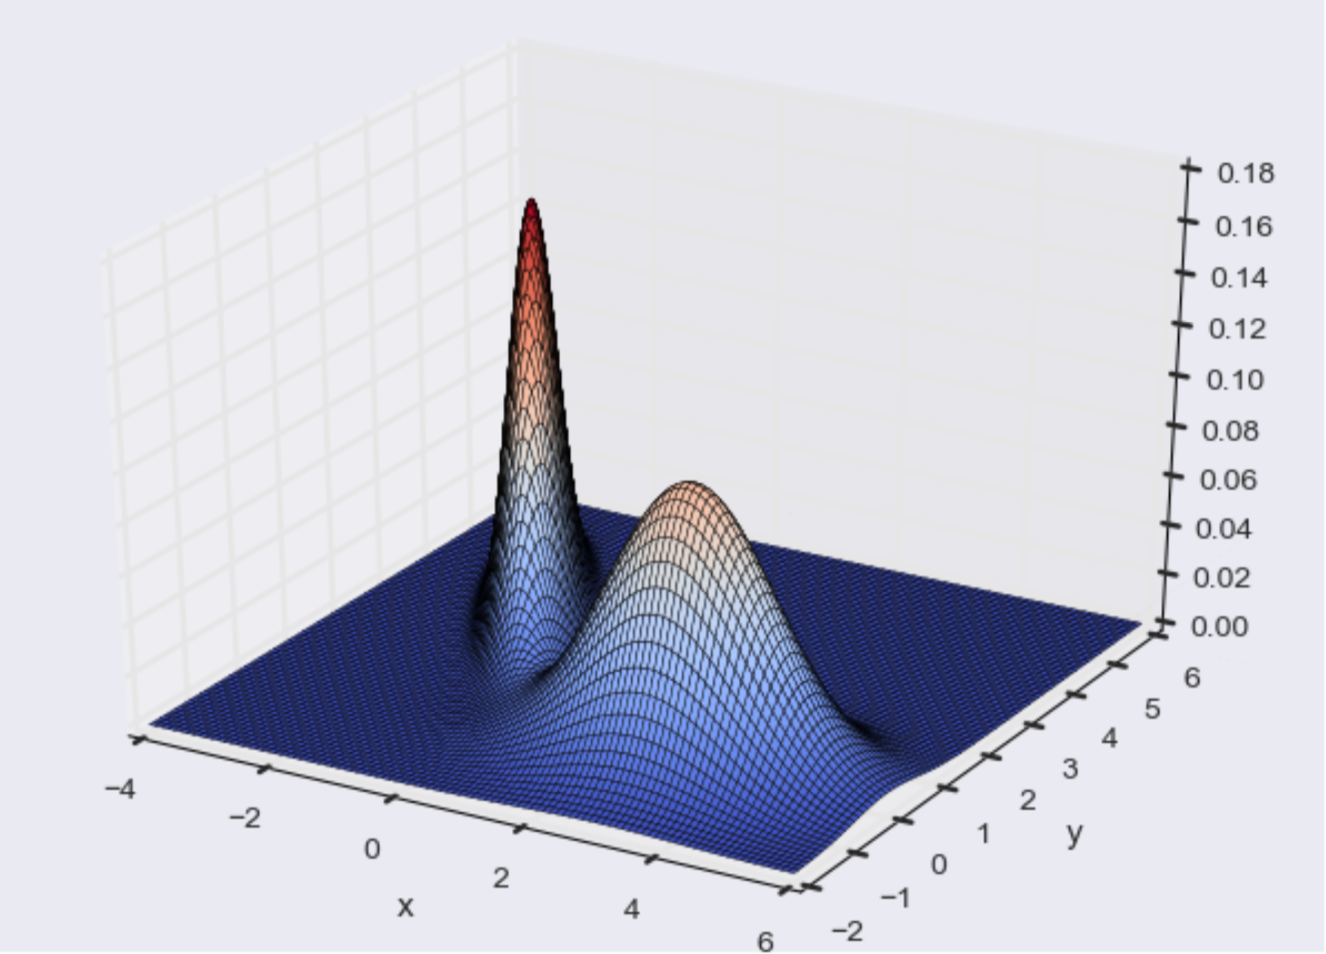

In [18]:
Image("2.png", width = 500, height = 200)

('The acceptance ratios are:', 0.3645)


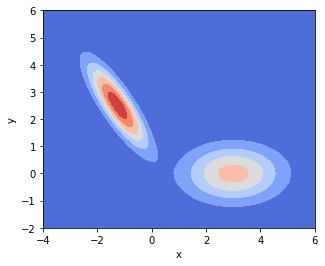

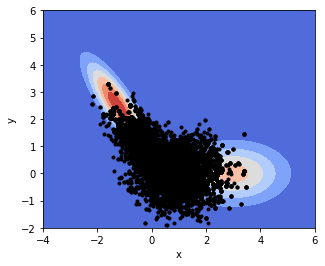

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


# Defining the probability distribution function, Bi-variate Normal
np.random.seed(123)
mu1 = [3,0]
sigma1 = [[1.5, 0], 
          [0, 0.5]]
N1 = multivariate_normal(mu1, sigma1)

mu2 = [-1.25,2.5]
sigma2 = [[0.5, -0.6], 
          [-0.6, 1.0]]
N2 = multivariate_normal(mu2, sigma2)

def pi(sample):
    """A mixed Gaussian model."""
    return 0.6*N1.pdf(sample) + 0.4*N2.pdf(sample)

'''
# The proposal function
# Unifrom proposal
def proposal(xc, delta, domain):
    xn = np.zeros(2)
    xn[0] = np.random.uniform(xc[0]-delta, xc[0]+delta)
    xn[1] = np.random.uniform(xc[1]-delta, xc[1]+delta)
    if (domain[0][0]<xn[0]< domain[0][1] and domain[1][0]<xn[1]< domain[1][1]):
        return xn
    else:
        proposal(xc, delta, domain)
'''
# Normal proposal
def proposal(xc, delta, domain):
    xn = np.zeros(2)
    xn[0] = np.random.normal(0, 1)
    xn[1] = np.random.normal(0,1)
    if (domain[0][0]<xn[0]< domain[0][1] and domain[1][0]<xn[1]< domain[1][1]):
        return xn
    else:
        proposal(xc, delta, domain)
# Accept function shows if we can accept the move or not
def accept(xc, xn):
    acc = False
    ratio = pi(xn)/pi(xc)
    if ratio > 1.:
       acc = True
    elif np.random.rand() < ratio:
       acc = True
    return acc

# Metropolice function
def metropolisMCMC(nmcs, delta, xc):
    x = np.zeros((nmcs,2))
    domain = np.array([[-4.,6.],[-2.,6.]])
    nSucc = 0
    for imcs in range(nmcs):
        x[imcs,:]= xc
        xn = proposal(xc, delta, domain)
        if(accept(xc,xn)):
            xc = xn
            nSucc += 1
    return x, float(nSucc)/nmcs

xx = np.array([0.2,0.])
x, succRatio = metropolisMCMC(10000, 1, xx)
print('The acceptance ratios are:',succRatio)
x_x = x[:,0]
x_y = x[:,1]

# Plot the contour
xz, y = np.mgrid[-4:6:100j, -2:6:100j]
plt.contourf(xz, y, pi(np.dstack((xz, y))), cmap='coolwarm')
plt.gca().set(aspect='equal');
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the contour and scatter points
xz, y = np.mgrid[-4:6:100j, -2:6:100j]
plt.contourf(xz, y, pi(np.dstack((xz, y))), cmap='coolwarm')
plt.gca().set(aspect='equal');
plt.scatter(x_x,x_y, color='black',marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**WATCH OUT**: the choice of **$x_0$**, **$\delta$ **, **proposal distribution** and also **the number of MC steps** have a great effect on the algorithms convergence!

## Metropolis - Hasting
It is a generalization of Metropolis algorithm for **non-symmetric proposal moves**. Metropolis implies that the proposal, p, is symmetric so the acceptance a probabilities become $a(x_c \to x_n) = \min\big\{1, \frac{\pi(x_n)}{\pi(x_c)}\big\}$. However, in Metropolis- Hasting $p(x_c \to  x_n)\neq p(x_n \to x_c)$ therefore, we will have:

$$
a(x_c \to x_n) = \min\big\{1, \frac{p(x_c \to x_n)\pi(x_n)}{p(x_n \to x_c) \pi(x_c)}\big\}
$$

As an example of an asymmetric proposal, instead of additive random steps like $p (x_n | x_c) = U [x_c -\delta, x_c + \delta]$, we could propose a multiplicative random steps such as:

$$
x_n = \beta x_c
$$

in which $\beta = U [\frac{1}{\phi}, \phi]$ and $\phi = 1.5$.
### When we use it?
When the distribution is **truncated** or **skewed**.
## Bayesian Inference using MCMC
As we mentioned, sometimes it is very difficult to find the value for the posterior distribution directly from the Bayes’ formula. Therefore, we can **infer** the posterior by **sampling** it using MCMC.
Let's consider an example.

To investigate the potential link between the risk of a heart attack and presence of a certain trait, **twelve studies** were run in which for each study **two type of groups** of people was considered: 
1. people with heart disease 
2. people with with no history of heart disease.

For each study, the proportion of having the genetic trait in each group was recorded. Following table shows the results for all the studies:


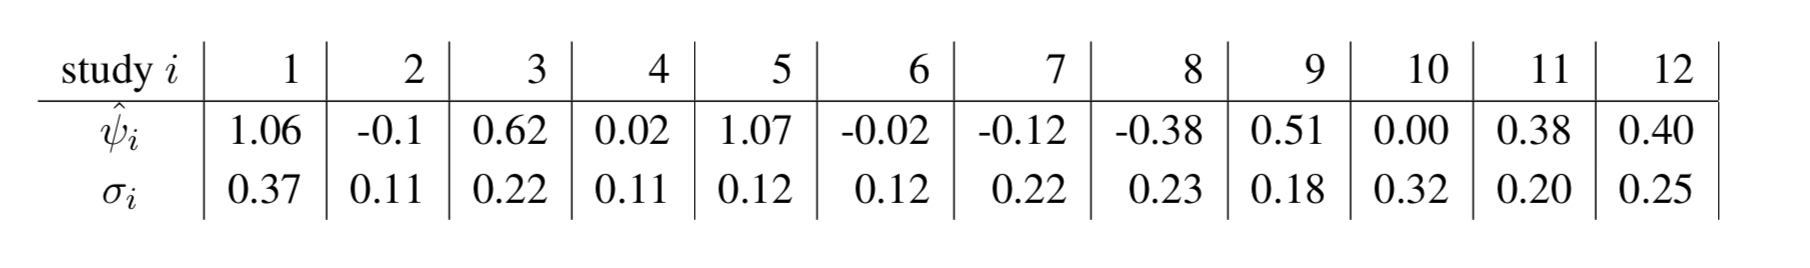

In [34]:
Image("3.png")

in which $\hat{\psi_i}$ is log odd ratio, ranges between $-\infty$ (trait protects from disease) through 0 (trait has no effect), to $+\infty$ (trait has a bad effect) and $\sigma_i$ is the measurement error. 
We assume that the **measurement error** has a distribution as follows:

$$
\hat{\psi_i} \sim \mathcal{N} (\psi_i, \sigma_i^2)
$$

also the **sampling error** is:

$$
\psi_i \sim \mathcal{N} (\mu, \tau^2)
$$

$\mu$ is the **true log odd ratio** which is obtained when you consider all of the data instead of a sample of them. Now, we want to apply **Bayesian analysis** to find the distribution of the true $\mu$ and $\tau^2$.

For the fisrt step we need to know the required elements of Bayesian formula which are **prior**, **posterior**, **likelihood** and **marginal**. Let's assume that these elements are as follows:

**Prior:**

$$
p(\mu, \tau^2) = \mathcal{N}(\mu; 0, 1000\tau^2)  Gamma(\frac{1}{\tau^2}; 0.1, 0.1)
$$

**Likelihood**:

$$
L(\{\hat{\psi_i}\} | \mu, \tau^2) = \prod_{i=1}^{12} \mathcal{l}(\hat{\psi_i} | \mu, \tau^2)
$$

in which:

$$
\mathcal{l}(\hat{\psi_i} | \mu, \tau^2) = \int_{-\infty}^{+\infty} \mathcal{N}(\hat{\psi_i}; \psi_i, \sigma^2) \mathcal{N}(\psi_i; \mu, \tau^2) d\psi_i
$$

**Posterior**:

$$
\pi(\mu, \tau^2 | \{\hat{\psi_i}, \sigma_i\}) \propto L(\{\hat{\psi_i}\} | \mu, \tau^2) p(\mu, \tau^2)
$$

Now, we can initialize $\mu$ and $\tau^2$. For example, $\mu = 1$ and $\tau^2 = 1$. Then evaluate posterior by calculating likelihood and prior. Finally, we will propose a random displacement of $\mu$ and $\tau^2$ to evaluate the new posterior. Here we want to use **Metropolis** algorithm so we will propose a symmetric proposal:

$$
\mu_{new} \sim \mathcal{N}(\mu_{old} , \Delta_\mu)\\
\tau_{new}^2 \sim \mathcal{N}(\tau_{old}^2 , \Delta_{\tau^2})
$$




('The expected value of u is:', 0.2705480739585438)


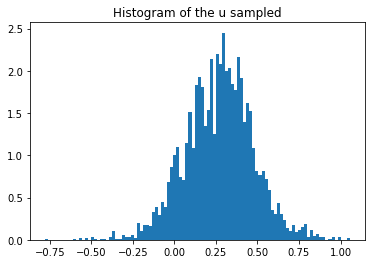

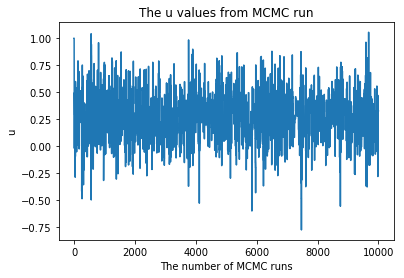

In [35]:
import numpy as np
from scipy.stats import gamma
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

np.random.seed(1234)

def prior(u,t):
    x = 1./t
    g = gamma.pdf(x, 0.1,0.1)
    n = stats.norm(0.,1000*t).pdf(u)
    y = g*n
    return y

def likelihood(x,s,u,t):
    y = (1./(2*np.pi*((s**2)+t))**0.5)*np.exp((-(u**2)*(s**2)-(x**2)*t+((u*(s**2)+x*t)**2/((s**2)+t)))/(2*(s**2)*t))
    return y

def posterior(u,t):
    x = [1.06,-0.1,0.62,0.02,1.07,-0.02,-0.12,-0.38,0.51,0.00,0.38,0.40]
    s = [0.37,0.11,0.22,0.11,0.12,0.12,0.22,0.23,0.18,0.32,0.20,0.25]
    k = 1.
    l = np.zeros(len(x))
    for i in range(len(x)):
        l[i] = likelihood(x[i],s[i],u,t)
        k = k * l[i]
    y = k * prior(u,t)
    return y

def proposal(uo,to,d1,d2):
    u_new  = np.random.normal(uo,d1)
    t_new = np.exp(np.random.normal(np.log(to),d2))
    return u_new, t_new

def accept(uo,to,u_new,t_new):
    acc = False
    r = posterior(u_new,t_new)/posterior(uo,to)
    if r > 1.:
        acc = True
    if r > np.random.rand():
        acc = True
    return acc

def mcmc(u,t,n,d1,d2):
    T = np.zeros(n)
    U = np.zeros(n)
    uo = u
    to = t
    succ = 0
    for i in range(n):
        U[i] = uo
        T[i] = to
        u_new,t_new = proposal(uo,to,d1,d2)
        if accept(uo,to,u_new,t_new):
            uo = u_new
            to = t_new
            succ += 1
    return U,T,float(succ)/n


u = 1.0
t = 1.0
n = 10000
d1 = 1
d2 = 0.5
U,T,success_ratio = mcmc(u,t,n,d1,d2)
ave = np.mean(U)
print('The expected value of u is:',ave)

# Figures
x = [i for i in range(n)]
plt.hist(U, 100,normed = True)
plt.title('Histogram of the u sampled')
plt.show()

plt.plot(x,U)
plt.title('The u values from MCMC run')
plt.xlabel('The number of MCMC runs')
plt.ylabel('u')
plt.show()


The first figure shows our $\mu$ samples. Moreover, the last figure shows that our algorithm works good.
Moreover, the expected value of $\mu$ is almost 0.27054807. We supposed the “true” log odds ratio for the population is $\mu$ and we know that it changes between $-\infty$ to $\infty$. Considering that the expected value is close to 0, we can conclude that the trait does almost no effect on the disease. 

## Disadvantage of MCMC
1.	**Dependency** of samples! As we mentioned, the samples has been generated dependently from the proposal distribution and so they are correlated. Therefore, we have to generate a lot of samples to get a sequence of independent samples. One way to solve this issue is **block averaging**.
2.	The other issue is its **convergence**. It is governed by the magnitude of the second largest eigenvalue of W.
3.	 As we mentioned before, the choice of **$x_0$**, **$\delta$**, **proposal distribution** and also **the number of MC steps** have a great effect on the algorithms convergence speed.

## References
1. http://www.statisticsdonewrong.com/
2. http://www.stat.cmu.edu/~rsteorts/btheory2/ch5_final2.pdf
3. https://www.utdallas.edu/~mbaron/
4. Dr. Sachin Shanbhag, (ISC5228-0001) Monte Carlo Methods, Spring 2018, Florida State University